<a href="https://colab.research.google.com/github/AilingLiu/Survival_analysis/blob/master/life_table_Kaplan_Meier_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Life tables are used to measure the probability of death at a given age and the life expectancy at varying ages. Actuarial science and of course life insurance companies need to know this in detail, so as in public health. There are two different kinds of life table:

* Cohort or generational life tables
* Current or period life tables

We will calculate the probability of survival at time t giving below table of patient status:

In [14]:
lifetab=pd.DataFrame({'Time(t)inYears': [0, 1, 4, 5, 6, 9, 9, 22],
                      'Censored': ([False]*4+[True, False]*2),
                      'NumAlive(T)': [8, 8, 6, 5, 4, 3, 2, 1],
                     'NumDied(T)': [0, 2, 1, 1, 0, 1, 0, 1]})
display(lifetab)

,Time(t)inYears,Censored,NumAlive(T),NumDied(T)
0,0,False,8,0
1,1,False,8,2
2,4,False,6,1
3,5,False,5,1
4,6,True,4,0
5,9,False,3,1
6,9,True,2,0
7,22,False,1,1


In [15]:
#the proportion of patients surviving past time t
lifetab['PropSurvive(T)'] = (lifetab['NumAlive(T)'] - lifetab['NumDied(T)'])/lifetab['NumAlive(T)']

#the probability of survival past time t
import functools

def mul(x, y):
  return x*y

def ret_mul(x):
  return functools.reduce(mul, x, 1)

lifetab['ProbOfSurvivalPastT'] = lifetab['PropSurvive(T)'].expanding().apply(ret_mul, raw=True)
display(lifetab.round(2))

,Time(t)inYears,Censored,NumAlive(T),NumDied(T),PropSurvive(T),ProbOfSurvivalPastT
0,0,False,8,0,1.00,1.00
1,1,False,8,2,0.75,0.75
2,4,False,6,1,0.83,0.62
3,5,False,5,1,0.80,0.50
4,6,True,4,0,1.00,0.50
5,9,False,3,1,0.67,0.33
6,9,True,2,0,1.00,0.33
7,22,False,1,1,0.00,0.00


Here's the complete survival curve relating to these data. You indicate that a patient was censored from the study with a little $\triangle$ on the curve on the day they were lost to follow-up:

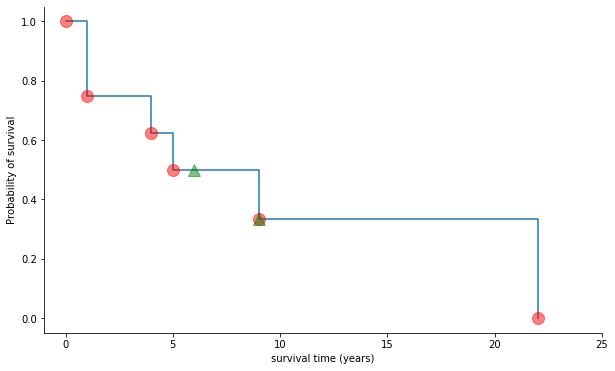

In [59]:
import seaborn as sns

x = lifetab['Time(t)inYears']
y = lifetab['ProbOfSurvivalPastT']
markers=np.where(lifetab['Censored'], '^', 'o').tolist()
colors = np.where(lifetab['Censored'], 'g', 'r').tolist()

plt.figure(figsize=(10, 6))
plt.step(x, y, where='post')
for i in range(len(x)):
    plt.plot(x[i], y[i], color=colors[i], alpha=0.5,  marker=markers[i], markersize=12)
plt.xlim(-1, 25)
plt.xlabel('survival time (years)')
plt.ylabel('Probability of survival')

sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()